# CSAI 301 - Project Phase 1
## Vacuum Cleaner Robot Problem
### Ahmed Wael 202201415
**********************************

# The Code
**************************************

### Import Libraries

In [2]:
from collections import deque  # BFS queue implementation
import heapq  # priority queue in UCS, Greedy, and A*
import time  # measuring execution time
import matplotlib.pyplot as plt  # visualization
import matplotlib.patches as patches  # drawing floor cells
from typing import Set, Tuple, List, FrozenSet  # Type hints for better code clarity

### Vacuum Cleaner Environment

In [3]:
class VacuumState:
    
    def __init__(self, position: Tuple[int, int], dirty_cells: FrozenSet[Tuple[int, int]]):
        self.position = position
        self.dirty_cells = dirty_cells
    
    def is_goal(self) -> bool:
        return len(self.dirty_cells) == 0
    
    def __eq__(self, other):
        return self.position == other.position and self.dirty_cells == other.dirty_cells
    
    def __hash__(self):
        return hash((self.position, self.dirty_cells))
    
    def __repr__(self):
        return f"VacuumState(pos={self.position}, dirty={self.dirty_cells})"


class environment:
    
    def __init__(self, floor_size: Tuple[int, int], initial_position: Tuple[int, int], 
                 dirty_cells: Set[Tuple[int, int]]):
        self.floor_size = floor_size
        self.initial_state = VacuumState(initial_position, frozenset(dirty_cells))
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT', 'CLEAN']
    
    def get_successors(self, state: VacuumState) -> List[Tuple[VacuumState, str, int]]:
        successors = []
        x, y = state.position
        
        if y > 0:
            new_state = VacuumState((x, y - 1), state.dirty_cells)
            successors.append((new_state, 'UP', 1))  
        
        if y < self.floor_size[1] - 1:
            new_state = VacuumState((x, y + 1), state.dirty_cells)
            successors.append((new_state, 'DOWN', 1))
        
        if x > 0:
            new_state = VacuumState((x - 1, y), state.dirty_cells)
            successors.append((new_state, 'LEFT', 1))
        
        if x < self.floor_size[0] - 1:
            new_state = VacuumState((x + 1, y), state.dirty_cells)
            successors.append((new_state, 'RIGHT', 1))
        
        # CLEAN action: if current cell is dirty, clean it
        if state.position in state.dirty_cells:
            # Create new set of dirty cells without the current position
            new_dirty = frozenset(state.dirty_cells - {state.position})
            new_state = VacuumState(state.position, new_dirty)
            successors.append((new_state, 'CLEAN', 1))
        
        return successors

In [4]:
floor_size = (5, 5)  # problem size 5x5
initial_position = (0, 0)  # Robot start position
dirty_cells = {(1, 1), (2, 2), (3, 3), (4, 4), (0, 4), (4, 0), (2, 0), (0, 2), (3, 1), (1, 3)} # dirty cells
problem = environment(floor_size, initial_position, dirty_cells)


In [5]:
print(f"Floor Size: {floor_size[0]} x {floor_size[1]}")
print(f"Initial Position: {initial_position}")
print(f"Number of Dirty Cells: {len(dirty_cells)}")
print(f"Dirty Cells: {(dirty_cells)}")
print(f"Problem Size: ={floor_size[0] * floor_size[1] * (2**len(dirty_cells))}")

Floor Size: 5 x 5
Initial Position: (0, 0)
Number of Dirty Cells: 10
Dirty Cells: {(4, 4), (4, 0), (0, 4), (3, 1), (1, 1), (2, 0), (0, 2), (3, 3), (2, 2), (1, 3)}
Problem Size: =25600


## Uninformed Search Algorithms

### Breadth-First Search (BFS)

In [6]:
def bfs(problem):
    frontier = deque([(problem.initial_state, [], 0)])  # (state, path, cost)
    visited = set()
    nodes_expanded = 0
    max_frontier_size = 1
    
    start_time = time.time() # Start time
    
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        
        state, path, cost = frontier.popleft() # Get the next state (FIFO) 
        
        # Check if dirt == 0 and end the While loop if true
        if state.is_goal(): # dirt == 0
            end_time = time.time() # End time
            excute_time = end_time - start_time
            
            # return results as a dictionary (key: value) 
            return {
                'path': path,
                'cost': cost,
                'nodes_expanded': nodes_expanded,
                'time': excute_time,
                'max_frontier_size': max_frontier_size,
                'success': True
            }
        
        
        
        if state not in visited:
            visited.add(state)
            nodes_expanded += 1
            
            # Generate and add all successors to the frontier
            for next_state, action, step_cost in problem.get_successors(state):
                if next_state not in visited:
                    # Add successor to the back of the queue (FIFO)
                    frontier.append((next_state, path + [action], cost + step_cost))
    

    # When No solution found
    end_time = time.time() # End time
    excute_time = end_time - start_time
    # return results as a dictionary (key: value)
    return {
        'path': None,
        'cost': None,
        'nodes_expanded': nodes_expanded,
        'time': excute_time,
        'max_frontier_size': max_frontier_size,
        'success': False
    }

In [7]:
bfsrun=bfs(problem)
print(f"Success: {bfsrun['success']}, Cost: {bfsrun['cost']}, "
      f"Nodes Expanded: {bfsrun['nodes_expanded']}, Time: {bfsrun['time']:.4f}s")

Success: True, Cost: 30, Nodes Expanded: 25483, Time: 0.1311s


### Depth-First Search (DFS)

In [8]:
def dfs(problem, depth_limit=50):
    frontier = [(problem.initial_state, [], 0, 0)]  # (state, path, cost, depth)
    visited = set()
    nodes_expanded = 0
    max_frontier_size = 1 # maximum nodes in memory
    start_time = time.time() # Start timing
    
    
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        state, path, cost, depth = frontier.pop() # Get the next state (LIFO) 
        
        # Check if dirt == 0 and end the While loop if true
        if state.is_goal(): # dirt == 0
            end_time = time.time() # End time
            excute_time = end_time - start_time
            
            # return results as a dictionary (key: value) 
            return {
                'path': path,
                'cost': cost,
                'nodes_expanded': nodes_expanded,
                'time': excute_time,
                'max_frontier_size': max_frontier_size,
                'success': True
            }
        
        
        if depth < depth_limit and state not in visited:
            visited.add(state)
            nodes_expanded += 1
            
            # Generate and add all successors to the frontier
            for next_state, action, step_cost in problem.get_successors(state):
                if next_state not in visited:
                    # Add successor to the top of the stack (LIFO)
                    frontier.append((next_state, path + [action], cost + step_cost, depth + 1))
    

    # When No solution found
    end_time = time.time() # End time
    excute_time = end_time - start_time
    # return results as a dictionary (key: value)
    return {
        'path': None,
        'cost': None,
        'nodes_expanded': nodes_expanded,
        'time': excute_time,
        'max_frontier_size': max_frontier_size,
        'success': False
    }

In [9]:
dfarun=dfs(problem)
print(f"Success: {dfarun['success']}, Cost: {dfarun['cost']}, "
      f"Nodes Expanded: {dfarun['nodes_expanded']}, Time: {dfarun['time']:.4f}s")

Success: True, Cost: 46, Nodes Expanded: 60, Time: 0.0002s


### Uniform Cost Search (UCS)

In [10]:
def ucs(problem):
    frontier = []
    counter = 0  # Tie-breaker for states with same cost
    heapq.heappush(frontier, (0, counter, (problem.initial_state, [], 0))) # (priority, counter, (state, path, cost))
    counter += 1
    
    # Dictionary to track the best cost to reach each state
    visited = {}
    nodes_expanded = 0
    max_frontier_size = 1 # maximum nodes in memory
    start_time = time.time() # Start timing
    

    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        
        # Get the state with lowest path cost from priority queue
        priority, _, (state, path, cost) = heapq.heappop(frontier)
        
        # Check if dirt == 0 and end the While loop if true
        if state.is_goal(): # dirt == 0
            end_time = time.time() # End time
            excute_time = end_time - start_time
            
            # return results as a dictionary (key: value) 
            return {
                'path': path,
                'cost': cost,
                'nodes_expanded': nodes_expanded,
                'time': excute_time,
                'max_frontier_size': max_frontier_size,
                'success': True
            }
        
        
        if state not in visited or cost < visited[state]:
            visited[state] = cost
            nodes_expanded += 1
            
            for next_state, action, step_cost in problem.get_successors(state):
                new_cost = cost + step_cost
                # Add if not explored or if we found a cheaper path
                if next_state not in visited or new_cost < visited.get(next_state, float('inf')):
                    heapq.heappush(frontier, (new_cost, counter, (next_state, path + [action], new_cost)))
                    counter += 1
    
    # When No solution found
    end_time = time.time() # End time
    excute_time = end_time - start_time
    # return results as a dictionary (key: value)
    return {
        'path': None,
        'cost': None,
        'nodes_expanded': nodes_expanded,
        'time': excute_time,
        'max_frontier_size': max_frontier_size,
        'success': False
    }

In [11]:
ucsrun=ucs(problem)
print(f"Success: {ucsrun['success']}, Cost: {ucsrun['cost']}, "
      f"Nodes Expanded: {ucsrun['nodes_expanded']}, Time: {ucsrun['time']:.4f}s")

Success: True, Cost: 30, Nodes Expanded: 25483, Time: 0.1497s


### Iterative Deepening Search (IDS)

In [12]:
def depth_limited_search(problem, limit):
    frontier = [(problem.initial_state, [], 0, 0)]  # (state, path, cost, depth)
    visited = set()
    nodes_expanded = 0
    max_frontier_size = 1
    
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        state, path, cost, depth = frontier.pop()
        # Check if dirt == 0 and end the While loop if true
        if state.is_goal():
            return {'found': True, 
                    'path': path, 
                    'cost': cost, 
                    'nodes_expanded': nodes_expanded, 
                    'max_frontier_size': max_frontier_size
                    }
        
        # explore within depth limit
        if depth < limit:
            if state not in visited:
                visited.add(state)
                nodes_expanded += 1
                
                # Add successors to frontier
                for next_state, action, step_cost in problem.get_successors(state):
                    if next_state not in visited:
                        frontier.append((next_state, path + [action], cost + step_cost, depth + 1))
    
    # No solution at this depth
    return {
        'found': False, 
        'nodes_expanded': nodes_expanded, 
        'max_frontier_size': max_frontier_size
        }


def ids(problem, max_depth=50):
    total_nodes_expanded = 0
    max_frontier_size = 0
    start_time = time.time() # Start timing
    
    for depth in range(max_depth):
        result = depth_limited_search(problem, depth)
        total_nodes_expanded += result['nodes_expanded']
        max_frontier_size = max(max_frontier_size, result['max_frontier_size'])
        
        # Check if solution found and end the for loop if true
        if result['found'] == True:
            end_time = time.time() # End time
            excute_time = end_time - start_time
            # return results as a dictionary (key: value)
            return {
                'path': result['path'],
                'cost': result['cost'],
                'nodes_expanded': total_nodes_expanded,
                'time': excute_time,
                'max_frontier_size': max_frontier_size,
                'success': True
            }
    
    # When No solution found
    end_time = time.time() # End time
    excute_time = end_time - start_time
    # return results as a dictionary (key: value)
    return {
        'path': None,
        'cost': None,
        'nodes_expanded': total_nodes_expanded,
        'time': excute_time,
        'max_frontier_size': max_frontier_size,
        'success': False
    }

In [13]:
idsrun=ids(problem)
print(f"Success: {idsrun['success']}, Cost: {idsrun['cost']}, "
      f"Nodes Expanded: {idsrun['nodes_expanded']}, Time: {idsrun['time']:.4f}s")

Success: True, Cost: 40, Nodes Expanded: 134741, Time: 0.4364s


## Heuristic Search Algorithms

### Heuristic Functions

In [14]:
def heuristic1(state):
    # no dirty cells
    if len(state.dirty_cells) == 0:
        return 0
    
    x, y = state.position
    min_distance = float('inf')
    
    for dirty_x, dirty_y in state.dirty_cells:
        distance = abs(x - dirty_x) + abs(y - dirty_y)
        min_distance = min(min_distance, distance)

    return min_distance + len(state.dirty_cells)


def heuristic2(state):
    if len(state.dirty_cells) == 0:
        return 0
    
    x, y = state.position
    total_distance = 0
    
    for dirty_x, dirty_y in state.dirty_cells:
        distance = abs(x - dirty_x) + abs(y - dirty_y)
        total_distance += distance
    
    return (total_distance // 2) + len(state.dirty_cells)

### Greedy Best-First Search

In [15]:
def greedy_best_first(problem, heuristic):

    frontier = []
    counter = 0
    h_value = heuristic(problem.initial_state)
    heapq.heappush(frontier, (h_value, counter, (problem.initial_state, [], 0))) # (h_value, counter, (state, path, cost))
    counter += 1
    
    visited = set()
    nodes_expanded = 0
    max_frontier_size = 1
    start_time = time.time() # Start timing
    
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        
        _, _, (state, path, cost) = heapq.heappop(frontier)
        
        # Check if dirt == 0 and end the While loop if true
        if state.is_goal():
            end_time = time.time() # End timing
            execute_time = end_time - start_time
            # return results as a dictionary (key: value)
            return {
                'path': path,
                'cost': cost,
                'nodes_expanded': nodes_expanded,
                'time': execute_time,
                'max_frontier_size': max_frontier_size,
                'success': True
            }
        
        # Explore this state
        if state not in visited:
            visited.add(state)
            nodes_expanded += 1
            
            
            for next_state, action, step_cost in problem.get_successors(state):
                if next_state not in visited:
                    # Priority is only the heuristic value h(n)
                    h_value = heuristic(next_state)
                    heapq.heappush(frontier, (h_value, counter, 
                                             (next_state, path + [action], cost + step_cost)))
                    counter += 1
    

    # No solution found
    end_time = time.time() # End timing
    execute_time = end_time - start_time
    # return results as a dictionary (key: value)
    return {
        'path': None,
        'cost': None,
        'nodes_expanded': nodes_expanded,
        'time': execute_time,
        'max_frontier_size': max_frontier_size,
        'success': False
    }

In [16]:
print("Greedy H1:")
gbfh1run=greedy_best_first(problem, heuristic1)
print(f"Success: {gbfh1run['success']}, Cost: {gbfh1run['cost']}, "
      f"Nodes Expanded: {gbfh1run['nodes_expanded']}, Time: {gbfh1run['time']:.4f}s")
print("Greedy H2:")
gbfh2run=greedy_best_first(problem, heuristic2)
print(f"Success: {gbfh2run['success']}, Cost: {gbfh2run['cost']}, "
      f"Nodes Expanded: {gbfh2run['nodes_expanded']}, Time: {gbfh2run['time']:.4f}s")

Greedy H1:
Success: True, Cost: 38, Nodes Expanded: 222, Time: 0.0012s
Greedy H2:
Success: True, Cost: 50, Nodes Expanded: 78, Time: 0.0004s


### A* Search

In [17]:
def a_star(problem, heuristic):
    
    frontier = []
    counter = 0
    g_value = 0  # Cost from start
    h_value = heuristic(problem.initial_state)  # cost to goal
    f_value = g_value + h_value  # Total estimated cost
    heapq.heappush(frontier, (f_value, counter, (problem.initial_state, [], g_value))) # (f_value, counter, (state, path, g_cost))
    counter += 1
    
    explored = {}
    nodes_expanded = 0
    max_frontier_size = 1
    
    start_time = time.time()
    
    while frontier:
        max_frontier_size = max(max_frontier_size, len(frontier))
        
        # Get state with lowest f(n) value
        _, _, (state, path, g_cost) = heapq.heappop(frontier)
        
        # Check if dirt == 0 and end the While loop if true
        if state.is_goal():
            end_time = time.time()
            execute_time = end_time - start_time
            # return results as a dictionary (key: value)
            return {
                'path': path,
                'cost': g_cost,
                'nodes_expanded': nodes_expanded,
                'time': execute_time,
                'max_frontier_size': max_frontier_size,
                'success': True
            }
        
        
        if state not in explored or g_cost < explored[state]:
            explored[state] = g_cost
            nodes_expanded += 1
            
            # Generate successors
            for next_state, action, step_cost in problem.get_successors(state):
                new_g_cost = g_cost + step_cost  # New path cost
                
                # Add if not explored or found cheaper path
                if next_state not in explored or new_g_cost < explored.get(next_state, float('inf')):
                    h_value = heuristic(next_state)  # Heuristic estimate
                    f_value = new_g_cost + h_value  # f(n) = g(n) + h(n)
                    heapq.heappush(frontier, (f_value, counter, 
                                             (next_state, path + [action], new_g_cost)))
                    counter += 1
    
    # No solution found
    end_time = time.time()
    execute_time = end_time - start_time
    # return results as a dictionary (key: value)
    return {
        'path': None,
        'cost': None,
        'nodes_expanded': nodes_expanded,
        'time': execute_time,
        'max_frontier_size': max_frontier_size,
        'success': False
    }

In [18]:
print("A* H1:")
a_star1run=a_star(problem, heuristic1)
print(f"Success: {a_star1run['success']}, Cost: {a_star1run['cost']}, "
      f"Nodes Expanded: {a_star1run['nodes_expanded']}, Time: {a_star1run['time']:.4f}s")

print("A* H2:")
a_star2run=a_star(problem, heuristic2)
print(f"Success: {a_star2run['success']}, Cost: {a_star2run['cost']}, "
      f"Nodes Expanded: {a_star2run['nodes_expanded']}, Time: {a_star2run['time']:.4f}s")

A* H1:
Success: True, Cost: 30, Nodes Expanded: 24130, Time: 0.1817s
A* H2:
Success: True, Cost: 30, Nodes Expanded: 24130, Time: 0.1817s
A* H2:
Success: True, Cost: 32, Nodes Expanded: 5758, Time: 0.0414s
Success: True, Cost: 32, Nodes Expanded: 5758, Time: 0.0414s


## Compare Performance

In [19]:
print("Summary of Results:")
print("--------------------------------")

print("Breadth-First Search:")
print(f"Success: {bfsrun['success']}, Cost: {bfsrun['cost']}, "
      f"Nodes Expanded: {bfsrun['nodes_expanded']}, Time: {bfsrun['time']:.4f}s")

print("Depth-First Search:")
print(f"Success: {dfarun['success']}, Cost: {dfarun['cost']}, "
      f"Nodes Expanded: {dfarun['nodes_expanded']}, Time: {dfarun['time']:.4f}s")

print("Uniform Cost Search:")
print(f"Success: {ucsrun['success']}, Cost: {ucsrun['cost']}, "
      f"Nodes Expanded: {ucsrun['nodes_expanded']}, Time: {ucsrun['time']:.4f}s")

print("Iterative Deepening Search:")
print(f"Success: {idsrun['success']}, Cost: {idsrun['cost']}, "
      f"Nodes Expanded: {idsrun['nodes_expanded']}, Time: {idsrun['time']:.4f}s")

print("Greedy H1:")
print(f"Success: {gbfh1run['success']}, Cost: {gbfh1run['cost']}, "
      f"Nodes Expanded: {gbfh1run['nodes_expanded']}, Time: {gbfh1run['time']:.4f}s")

print("Greedy H2:")
print(f"Success: {gbfh2run['success']}, Cost: {gbfh2run['cost']}, "
      f"Nodes Expanded: {gbfh2run['nodes_expanded']}, Time: {gbfh2run['time']:.4f}s")

print("A* H1:")
print(f"Success: {a_star1run['success']}, Cost: {a_star1run['cost']}, "
      f"Nodes Expanded: {a_star1run['nodes_expanded']}, Time: {a_star1run['time']:.4f}s")

print("A* H2:")
print(f"Success: {a_star2run['success']}, Cost: {a_star2run['cost']}, "
      f"Nodes Expanded: {a_star2run['nodes_expanded']}, Time: {a_star2run['time']:.4f}s")

Summary of Results:
--------------------------------
Breadth-First Search:
Success: True, Cost: 30, Nodes Expanded: 25483, Time: 0.1311s
Depth-First Search:
Success: True, Cost: 46, Nodes Expanded: 60, Time: 0.0002s
Uniform Cost Search:
Success: True, Cost: 30, Nodes Expanded: 25483, Time: 0.1497s
Iterative Deepening Search:
Success: True, Cost: 40, Nodes Expanded: 134741, Time: 0.4364s
Greedy H1:
Success: True, Cost: 38, Nodes Expanded: 222, Time: 0.0012s
Greedy H2:
Success: True, Cost: 50, Nodes Expanded: 78, Time: 0.0004s
A* H1:
Success: True, Cost: 30, Nodes Expanded: 24130, Time: 0.1817s
A* H2:
Success: True, Cost: 32, Nodes Expanded: 5758, Time: 0.0414s


### Performance Table

In [20]:
# comparison table
print("\n" + "="*100)
print("PERFORMANCE COMPARISON TABLE")
print("="*100)
print(f"{'Algorithm':<20} {'Success':<10} {'Cost':<10} {'Nodes Expanded':<20} {'Time (s)':<20} {'Memory':<10}")
print("-"*100)


print(f"{'BFS':<20} {bfsrun['success']:<10} {bfsrun['cost']:<10} {bfsrun['nodes_expanded']:<20} {bfsrun['time']:.4f}{'':<15} {bfsrun['max_frontier_size']:<10}")
print(f"{'DFS':<20} {dfarun['success']:<10} {dfarun['cost']:<10} {dfarun['nodes_expanded']:<20} {dfarun['time']:.4f}{'':<15} {dfarun['max_frontier_size']:<10}")
print(f"{'UCS':<20} {ucsrun['success']:<10} {ucsrun['cost']:<10} {ucsrun['nodes_expanded']:<20} {ucsrun['time']:.4f}{'':<15} {ucsrun['max_frontier_size']:<10}")
print(f"{'IDS':<20} {idsrun['success']:<10} {idsrun['cost']:<10} {idsrun['nodes_expanded']:<20} {idsrun['time']:.4f}{'':<15} {idsrun['max_frontier_size']:<10}")
print(f"{'Greedy H1':<20} {gbfh1run['success']:<10} {gbfh1run['cost']:<10} {gbfh1run['nodes_expanded']:<20} {gbfh1run['time']:.4f}{'':<15} {gbfh1run['max_frontier_size']:<10}")
print(f"{'Greedy H2':<20} {gbfh2run['success']:<10} {gbfh2run['cost']:<10} {gbfh2run['nodes_expanded']:<20} {gbfh2run['time']:.4f}{'':<15} {gbfh2run['max_frontier_size']:<10}")
print(f"{'A* H1':<20} {a_star1run['success']:<10} {a_star1run['cost']:<10} {a_star1run['nodes_expanded']:<20} {a_star1run['time']:.4f}{'':<15} {a_star1run['max_frontier_size']:<10}")
print(f"{'A* H2':<20} {a_star2run['success']:<10} {a_star2run['cost']:<10} {a_star2run['nodes_expanded']:<20} {a_star2run['time']:.4f}{'':<15} {a_star2run['max_frontier_size']:<10}")
print("="*100)



PERFORMANCE COMPARISON TABLE
Algorithm            Success    Cost       Nodes Expanded       Time (s)             Memory    
----------------------------------------------------------------------------------------------------
BFS                  1          30         25483                0.1311                4260      
DFS                  1          46         60                   0.0002                71        
UCS                  1          30         25483                0.1497                4260      
IDS                  1          40         134741               0.4364                65        
Greedy H1            1          38         222                  0.0012                234       
Greedy H2            1          50         78                   0.0004                125       
A* H1                1          30         24130                0.1817                5387      
A* H2                1          32         5758                 0.0414                4092    

## Visualization

### Performance Charts

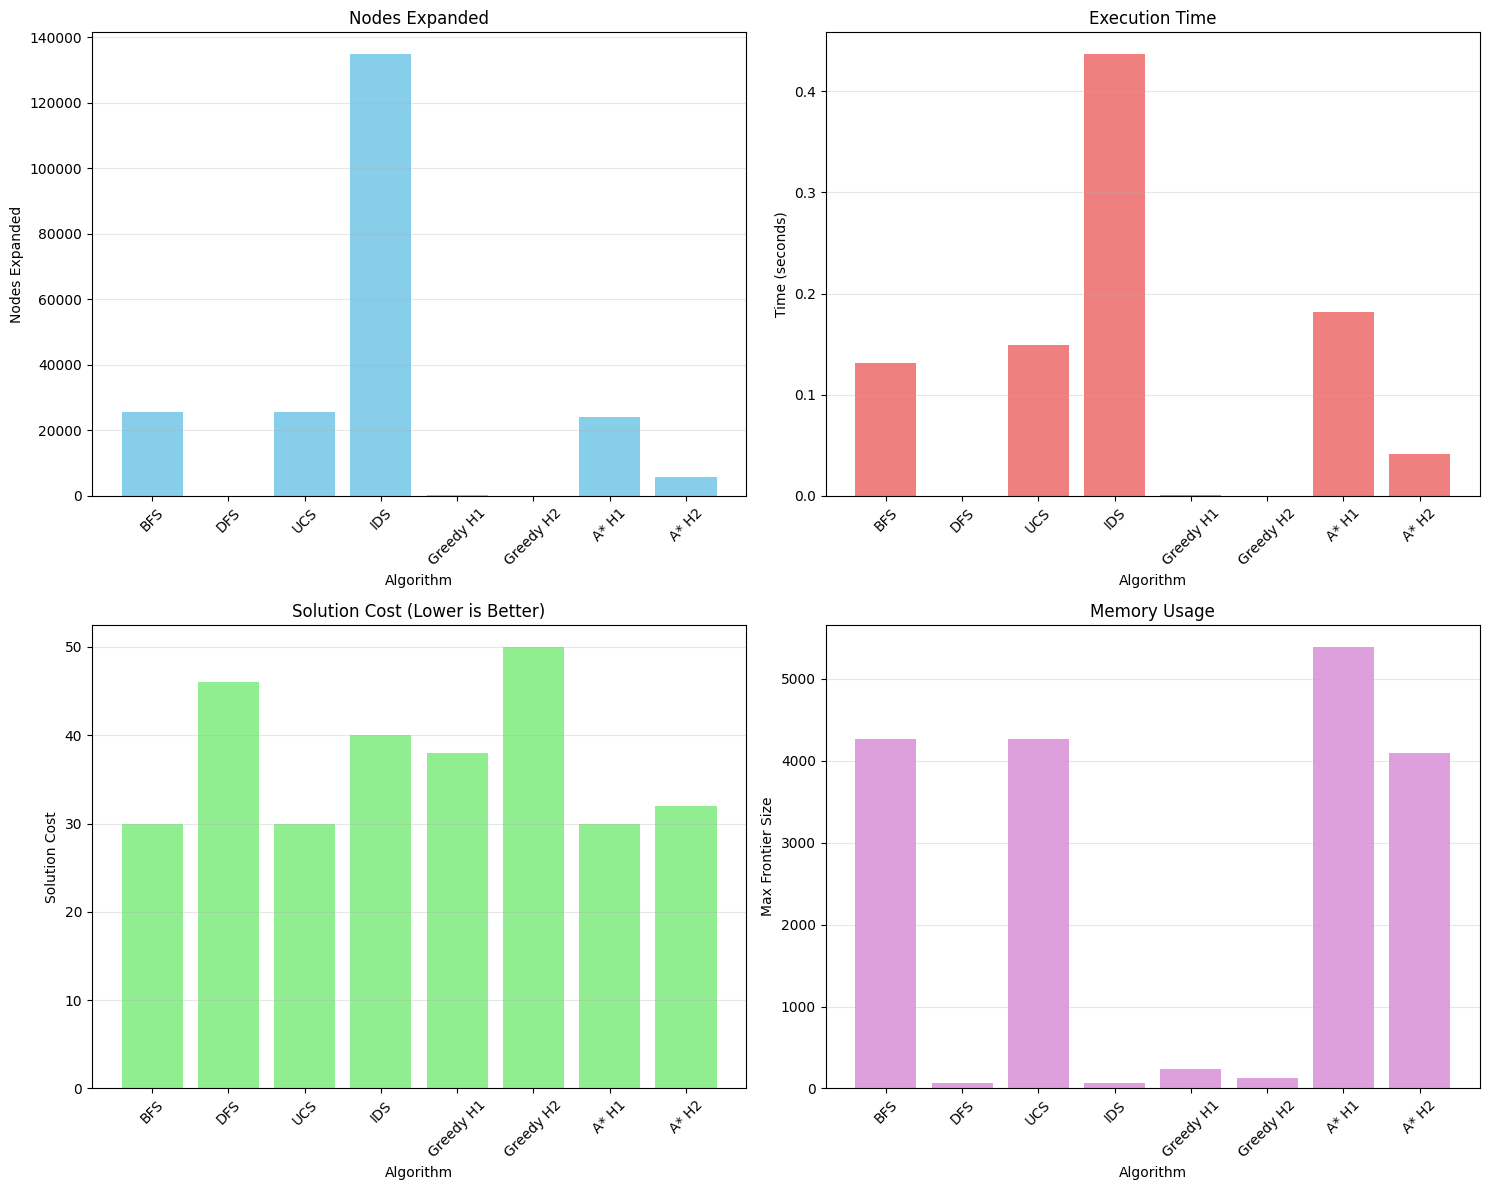

In [21]:
results = {
    'BFS': bfsrun,
    'DFS': dfarun,
    'UCS': ucsrun,
    'IDS': idsrun,
    'Greedy H1': gbfh1run,
    'Greedy H2': gbfh2run,
    'A* H1': a_star1run,
    'A* H2': a_star2run
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Extract data for plotting
algorithms = list(results.keys())
nodes_expanded = []
times = []
costs = []
memory_usage = []
for algo in algorithms:
    res = results[algo]
    nodes_expanded.append(res.get('nodes_expanded', 0))
    times.append(res.get('time', 0))
    costs.append(res.get('cost', 0) if res.get('cost') is not None else 0)
    memory_usage.append(res.get('max_frontier_size', 0))

# 1. Nodes Expanded 
axes[0, 0].bar(algorithms, nodes_expanded, color='skyblue')
axes[0, 0].set_xlabel('Algorithm')
axes[0, 0].set_ylabel('Nodes Expanded')
axes[0, 0].set_title('Nodes Expanded')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Execution Time 
axes[0, 1].bar(algorithms, times, color='lightcoral')
axes[0, 1].set_xlabel('Algorithm')
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].set_title('Execution Time')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Solution Cost 
axes[1, 0].bar(algorithms, costs, color='lightgreen')
axes[1, 0].set_xlabel('Algorithm')
axes[1, 0].set_ylabel('Solution Cost')
axes[1, 0].set_title('Solution Cost (Lower is Better)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Memory Usage 
axes[1, 1].bar(algorithms, memory_usage, color='plum')
axes[1, 1].set_xlabel('Algorithm')
axes[1, 1].set_ylabel('Max Frontier Size')
axes[1, 1].set_title('Memory Usage')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Visualize Solution Path function

In [22]:
def visualize_solution(problem, solution_path, algorithm_name):
    current_state = problem.initial_state
    states = [current_state]
    
    for action in solution_path:
        successors = problem.get_successors(current_state)
        for next_state, act, _ in successors:
            if act == action:
                current_state = next_state
                states.append(current_state)
                break
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Initial state
    ax = axes[0]
    ax.set_xlim(-0.5, problem.floor_size[0] - 0.5)
    ax.set_ylim(-0.5, problem.floor_size[1] - 0.5)
    ax.set_aspect('equal')
    ax.set_title(f'{algorithm_name}: Initial State', fontsize=14, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)
    
    # Draw grid
    for i in range(problem.floor_size[0]):
        for j in range(problem.floor_size[1]):
            rect = patches.Rectangle((i-0.5, j-0.5), 1, 1, linewidth=1, 
                                     edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    
    # Draw dirty cells
    for dirty_cell in problem.initial_state.dirty_cells:
        rect = patches.Rectangle((dirty_cell[0]-0.5, dirty_cell[1]-0.5), 1, 1, 
                                 linewidth=1, edgecolor='black', facecolor='brown', alpha=0.5)
        ax.add_patch(rect)
        ax.text(dirty_cell[0], dirty_cell[1], 'D', ha='center', va='center', 
               fontsize=12, fontweight='bold', color='white')
    
    # Draw robot initial position
    robot_x, robot_y = problem.initial_state.position
    circle = patches.Circle((robot_x, robot_y), 0.3, color='blue', zorder=3)
    ax.add_patch(circle)
    ax.text(robot_x, robot_y, 'R', ha='center', va='center', 
           fontsize=10, fontweight='bold', color='white')
    
    # Path visualization (middle plot)
    ax = axes[1]
    ax.set_xlim(-0.5, problem.floor_size[0] - 0.5)
    ax.set_ylim(-0.5, problem.floor_size[1] - 0.5)
    ax.set_aspect('equal')
    ax.set_title(f'{algorithm_name}: Solution Path', fontsize=14, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)
    
    # Draw grid
    for i in range(problem.floor_size[0]):
        for j in range(problem.floor_size[1]):
            rect = patches.Rectangle((i-0.5, j-0.5), 1, 1, linewidth=1, 
                                     edgecolor='black', facecolor='white')
            ax.add_patch(rect)
    
    # Draw initial dirty cells
    for dirty_cell in problem.initial_state.dirty_cells:
        rect = patches.Rectangle((dirty_cell[0]-0.5, dirty_cell[1]-0.5), 1, 1, 
                                 linewidth=1, edgecolor='black', facecolor='brown', alpha=0.3)
        ax.add_patch(rect)
    
    # Draw path
    positions = [state.position for state in states]
    for i in range(len(positions) - 1):
        x1, y1 = positions[i]
        x2, y2 = positions[i + 1]
        ax.arrow(x1, y1, (x2-x1)*0.8, (y2-y1)*0.8, head_width=0.15, 
                head_length=0.1, fc='green', ec='green', linewidth=2, zorder=2)
    
    # Draw start and end
    start_x, start_y = positions[0]
    circle = patches.Circle((start_x, start_y), 0.3, color='blue', zorder=3)
    ax.add_patch(circle)
    ax.text(start_x, start_y, 'S', ha='center', va='center', 
           fontsize=10, fontweight='bold', color='white')
    
    end_x, end_y = positions[-1]
    circle = patches.Circle((end_x, end_y), 0.3, color='red', zorder=3)
    ax.add_patch(circle)
    ax.text(end_x, end_y, 'E', ha='center', va='center', 
           fontsize=10, fontweight='bold', color='white')
    
    # Final state
    ax = axes[2]
    ax.set_xlim(-0.5, problem.floor_size[0] - 0.5)
    ax.set_ylim(-0.5, problem.floor_size[1] - 0.5)
    ax.set_aspect('equal')
    ax.set_title(f'{algorithm_name}: Final State (All Clean)', fontsize=14, fontweight='bold')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)
    
    # Draw grid (all clean)
    for i in range(problem.floor_size[0]):
        for j in range(problem.floor_size[1]):
            rect = patches.Rectangle((i-0.5, j-0.5), 1, 1, linewidth=1, 
                                     edgecolor='black', facecolor='lightgreen', alpha=0.3)
            ax.add_patch(rect)
    
    # Draw robot final position
    robot_x, robot_y = states[-1].position
    circle = patches.Circle((robot_x, robot_y), 0.3, color='red', zorder=3)
    ax.add_patch(circle)
    ax.text(robot_x, robot_y, 'R', ha='center', va='center', 
           fontsize=10, fontweight='bold', color='white')
    
    plt.tight_layout()
    plt.show()

### Visualize Solution

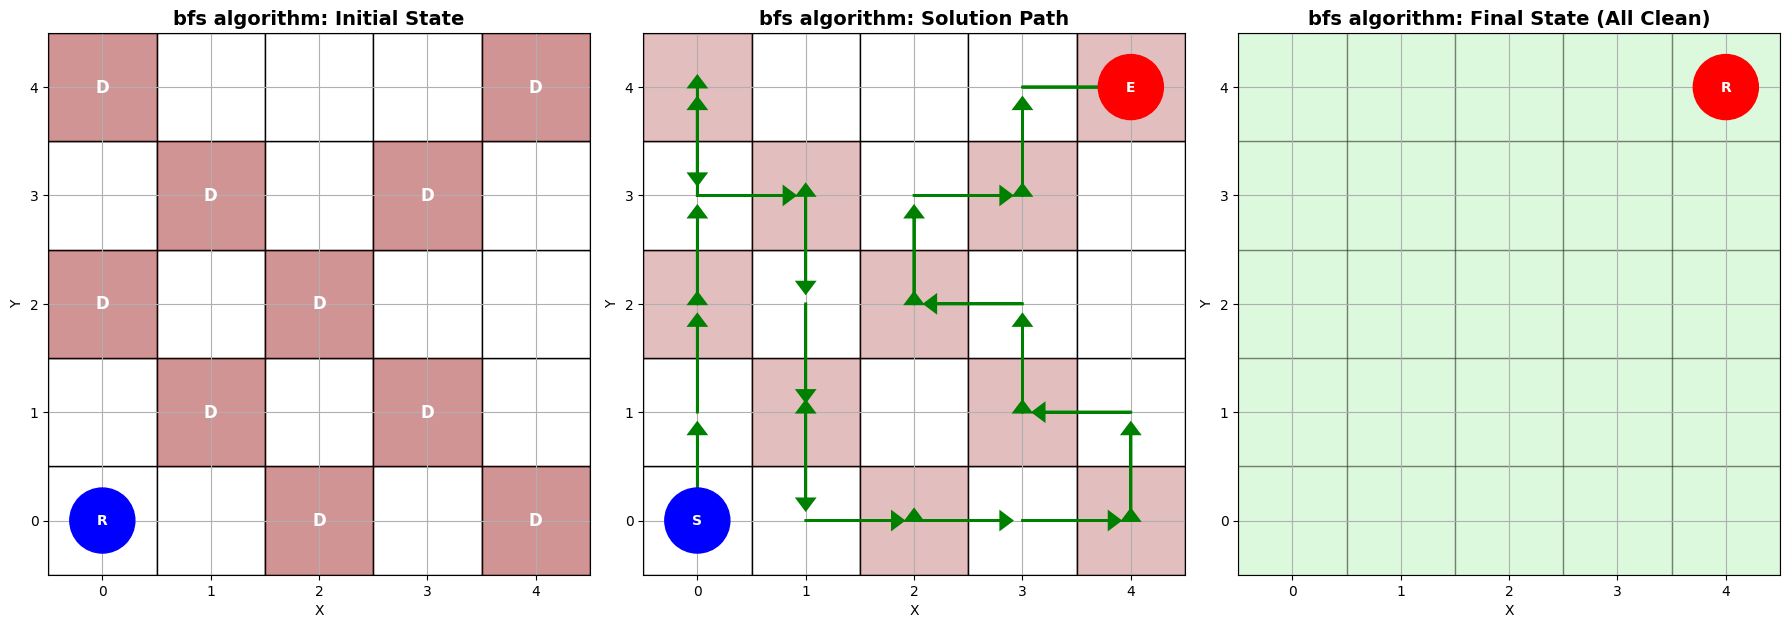

In [23]:
# Visualize DFS solution
visualize_solution(problem, bfsrun['path'], 'bfs algorithm')

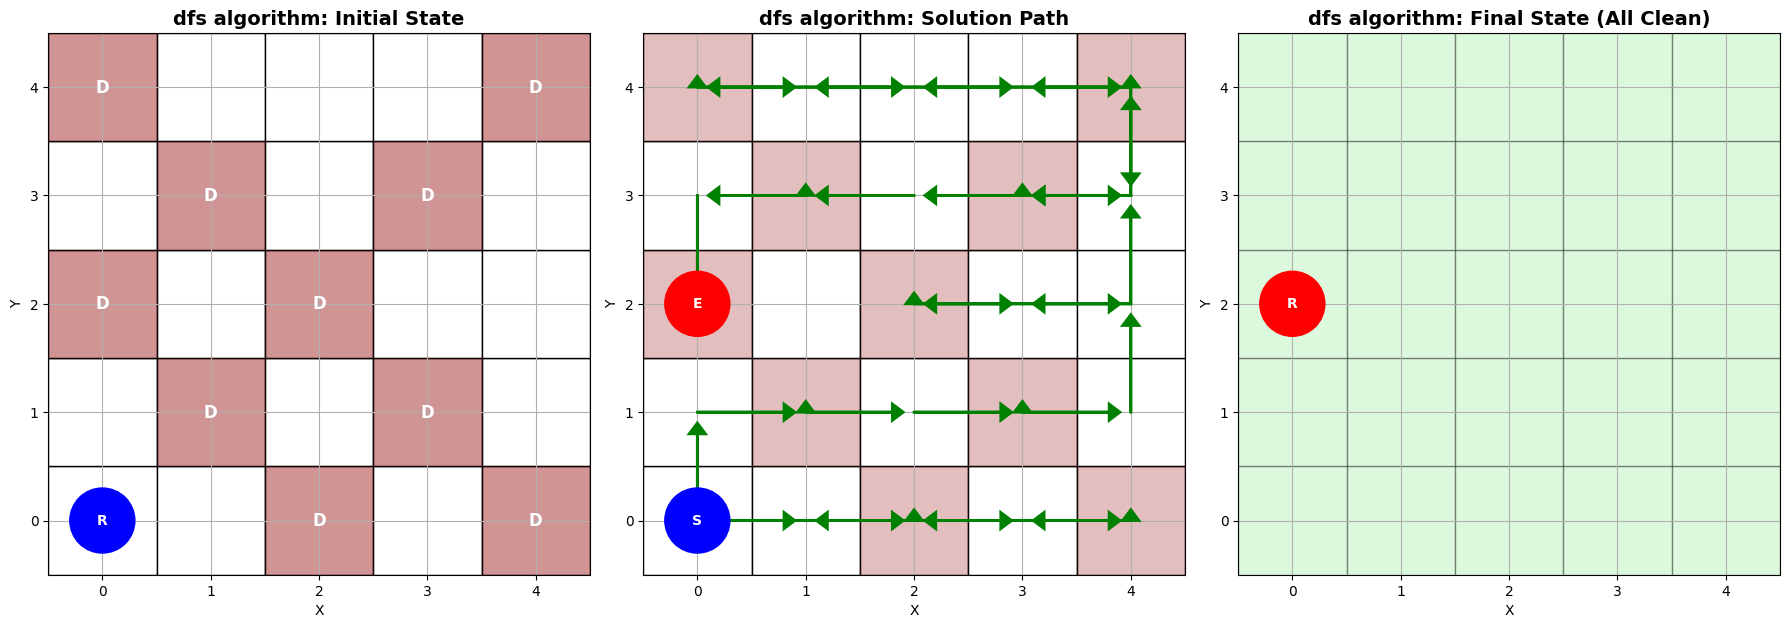

In [24]:
# Visualize DFS solution
visualize_solution(problem, dfarun['path'], 'dfs algorithm')

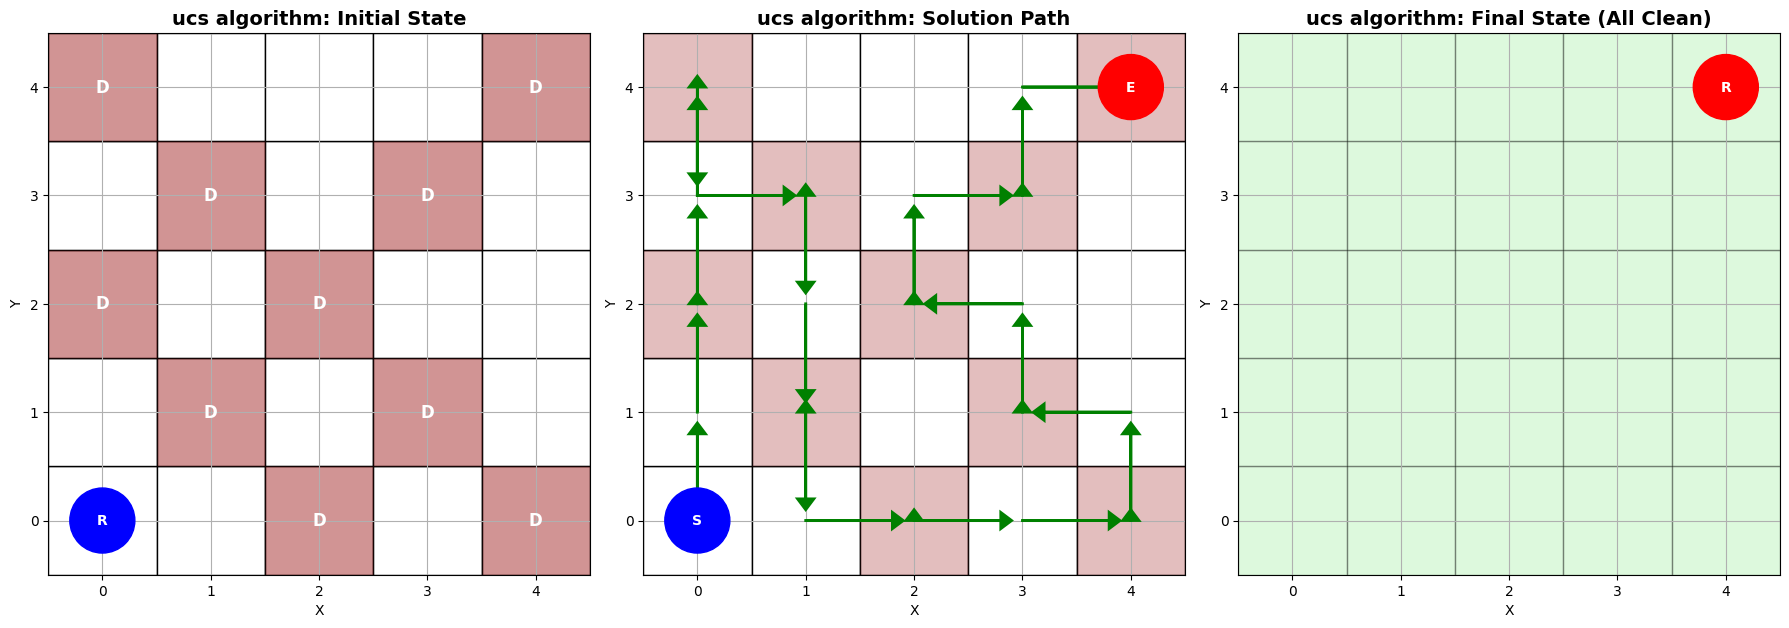

In [25]:
# Visualize UCS solution
visualize_solution(problem, ucsrun['path'], 'ucs algorithm')

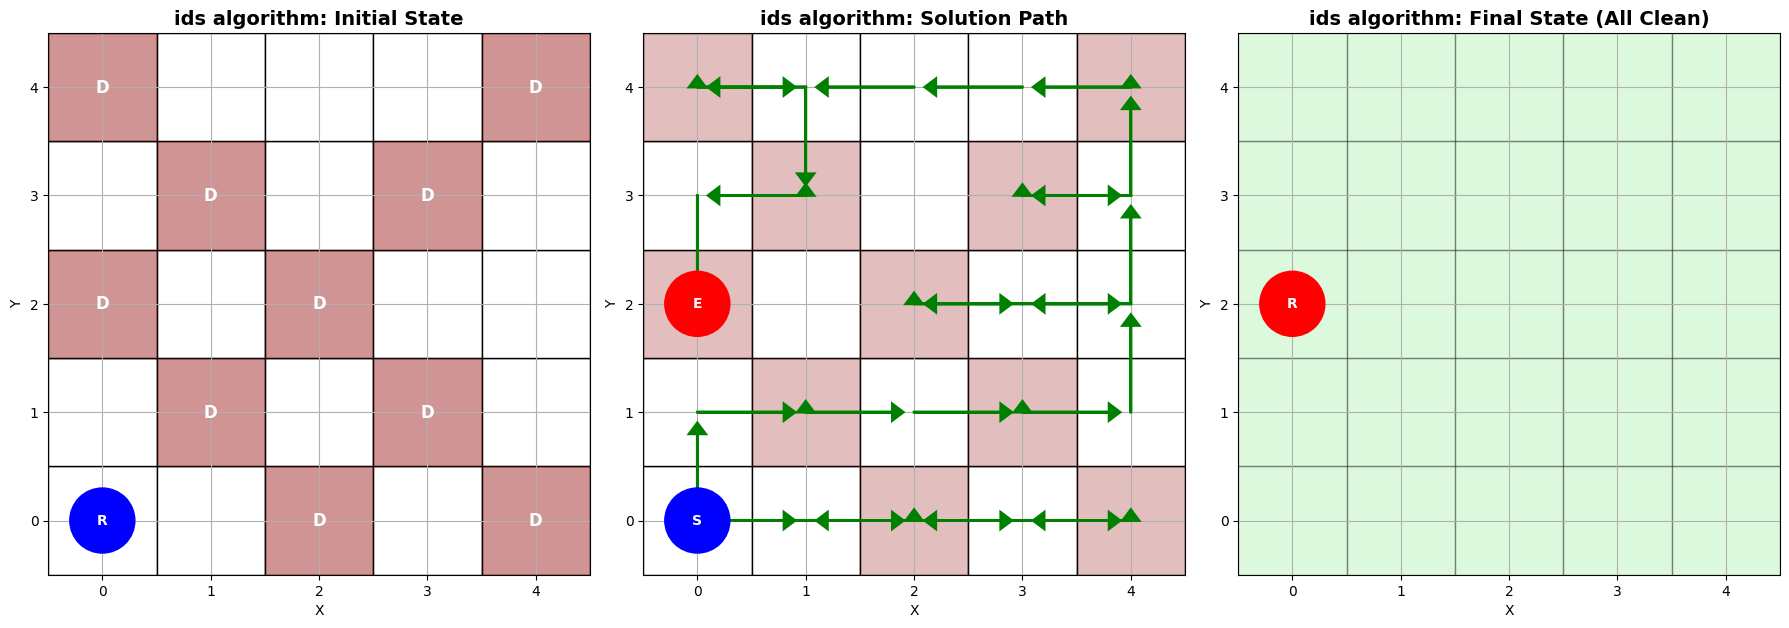

In [26]:
# Visualize IDS solution
visualize_solution(problem, idsrun['path'], 'ids algorithm')

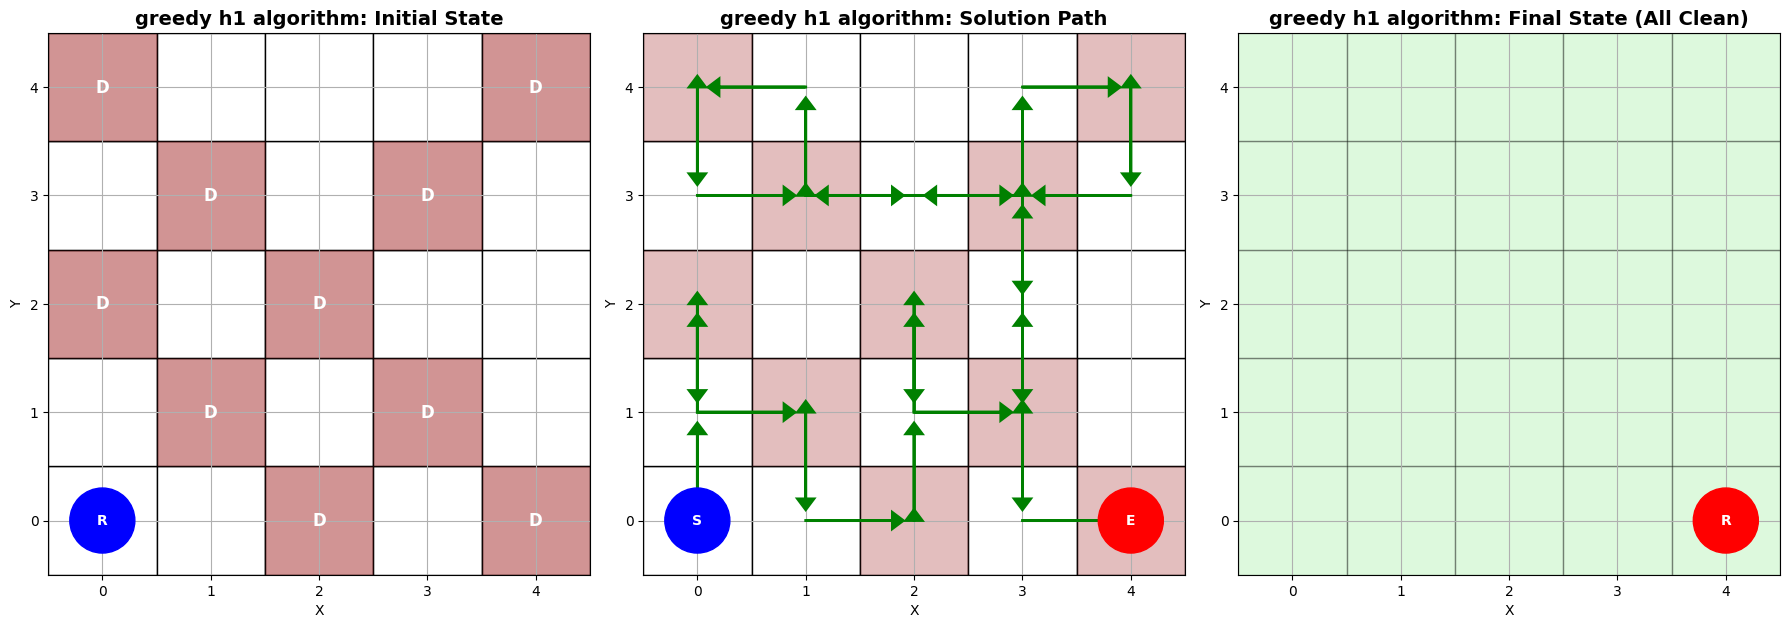

In [27]:
# Visualize Greedy H1 solution
visualize_solution(problem, gbfh1run['path'], 'greedy h1 algorithm')

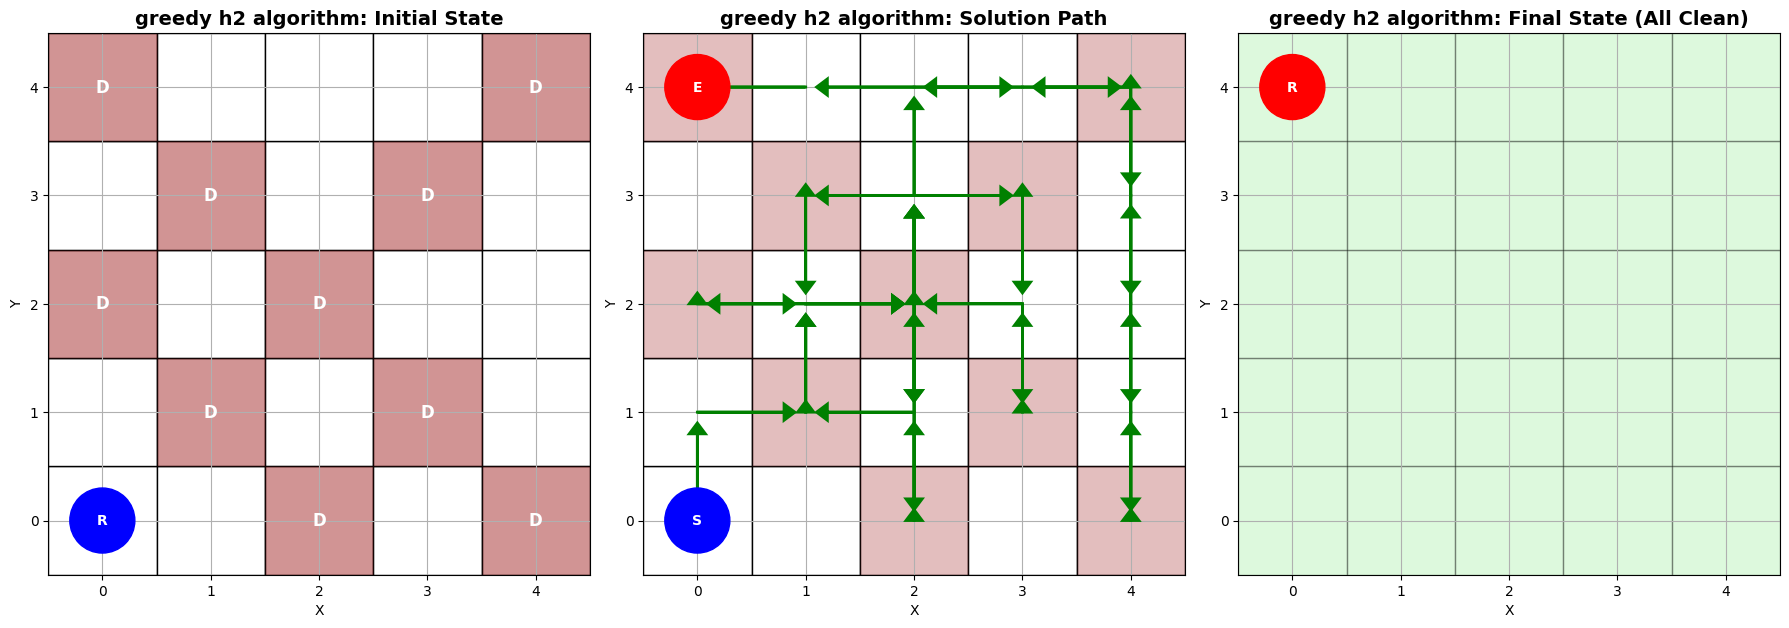

In [28]:
# Visualize Greedy H2 solution
visualize_solution(problem, gbfh2run['path'], 'greedy h2 algorithm')

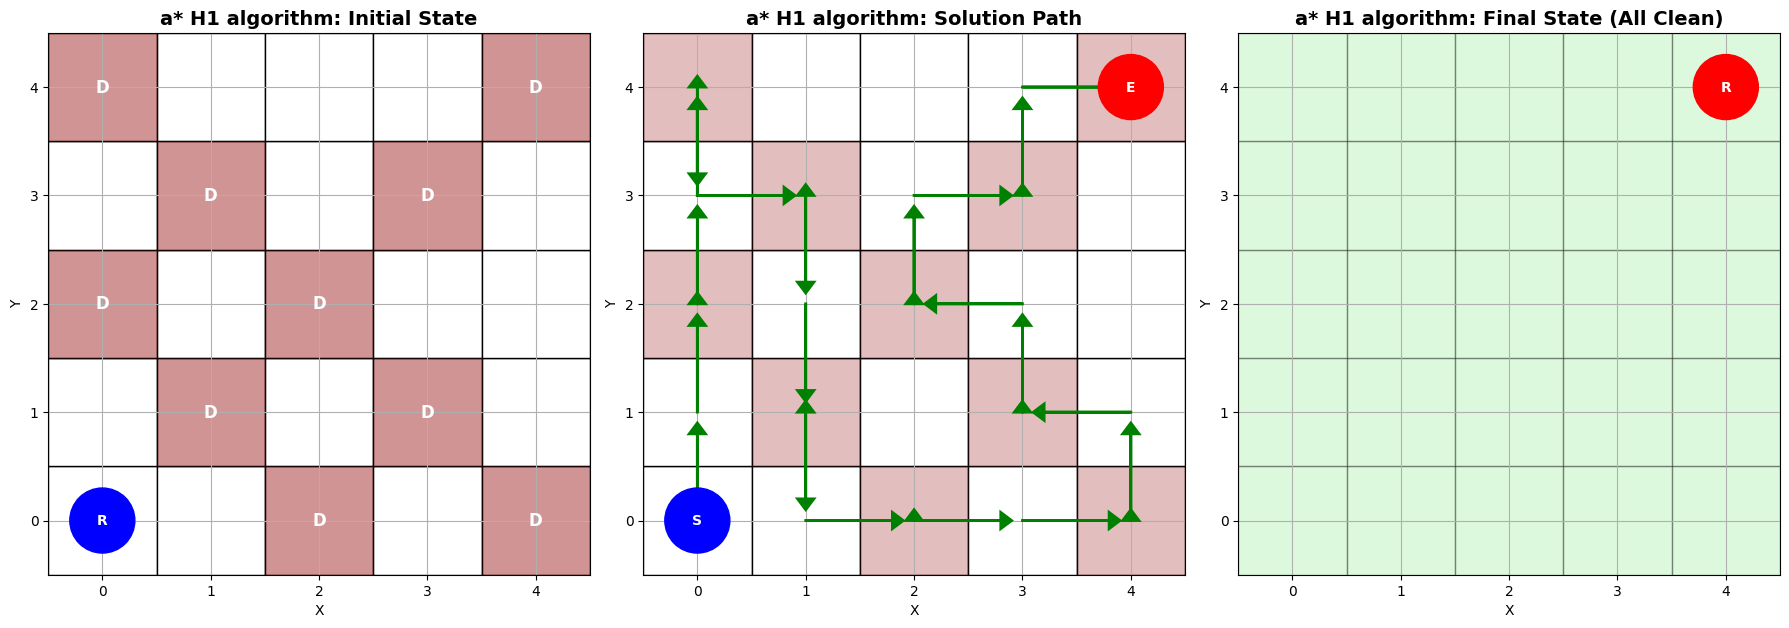

In [29]:
# Visualize A* H1 solution
visualize_solution(problem, a_star1run['path'], 'a* H1 algorithm')

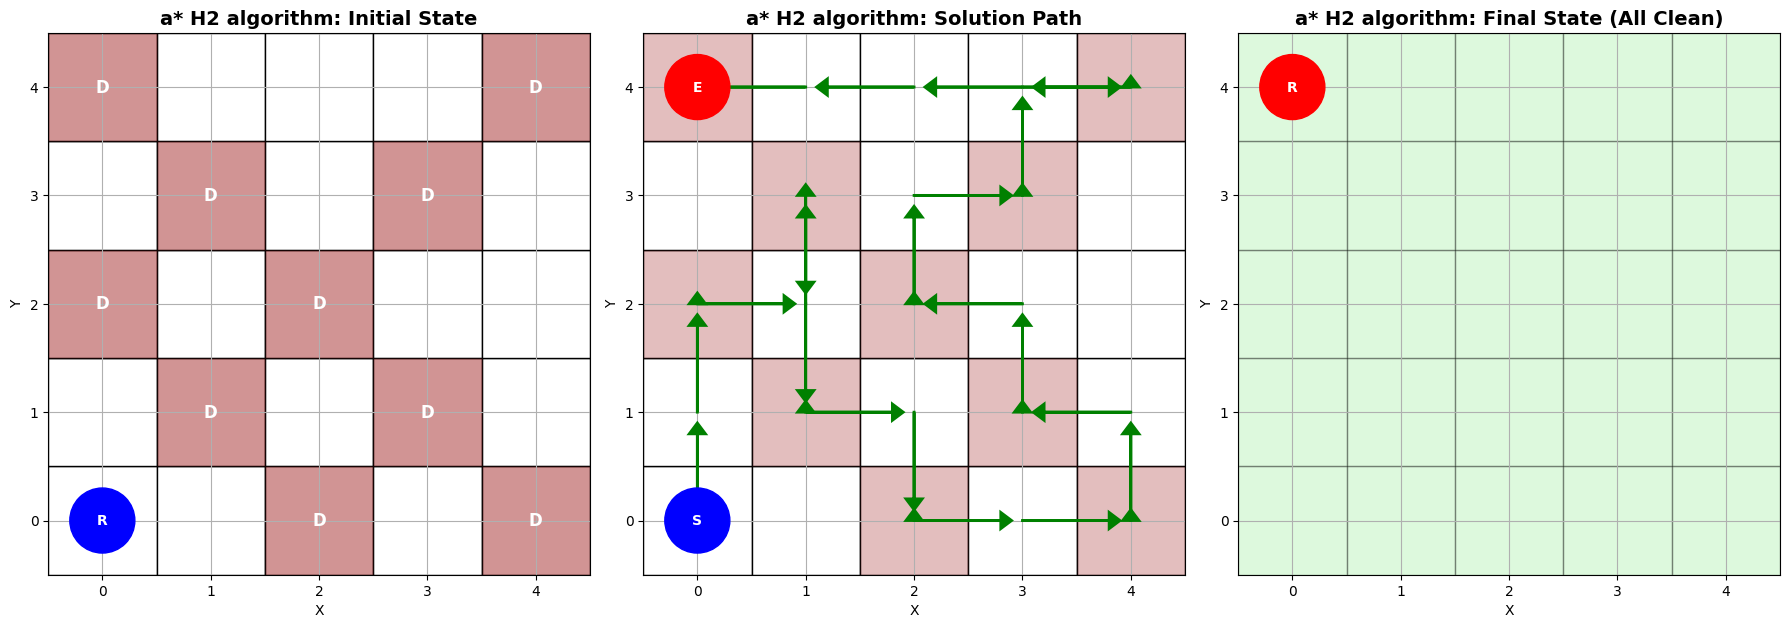

In [30]:
# Visualize A* H2 solution
visualize_solution(problem, a_star2run['path'], 'a* H2 algorithm')